In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/생물정보학실습데이터/final_data.HepG2.Histone.Enhancer.csv')

In [2]:
df = pd.read_csv('22_final_data.HepG2.Histone.Enhancer.csv')

In [3]:
df

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7129,chrX:9217960-9243246,AC003684.1,0.00000,0.0,0.0,4.01233,0.00000,0.0,0.0,0.0,0.0,1
7130,chrX:9983294-10112514,WWC3,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1
7131,chrX:99899192-99930785,SRPX2,0.00000,0.0,0.0,0.00000,4.75055,0.0,0.0,0.0,0.0,1
7132,chrX:9992882-10006694,WWC3-AS1,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1


In [ ]:
# !pip install missingno

<AxesSubplot:>

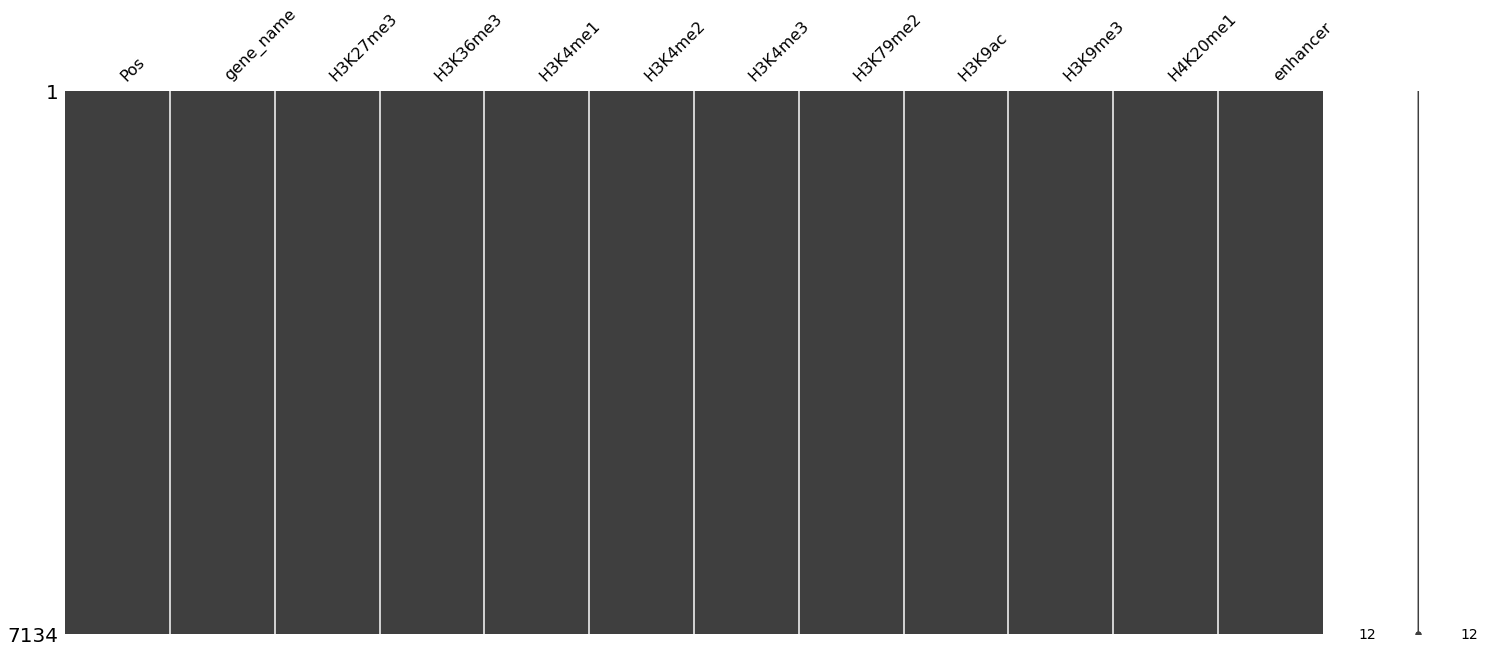

In [4]:
# 결측치 확인
import missingno as msno
display(msno.matrix(df))

<AxesSubplot:>

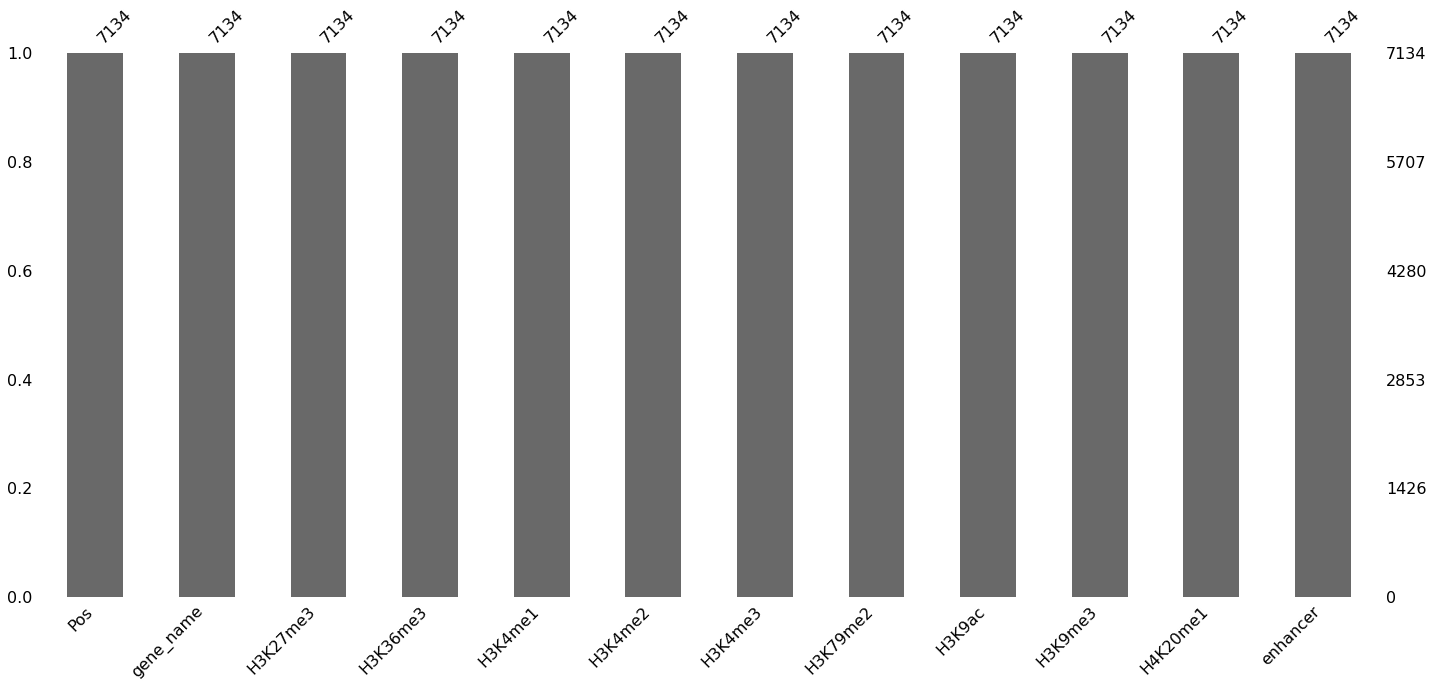

In [5]:
display(msno.bar(df))

In [ ]:
# missing = df.isnull().sum()
# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# missing.plot.bar(figsize = (12,6))

In [6]:
df.describe()

,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000
mean,1.425158,0.050376,0.925676,3.088716,3.559854,0.403111,0.898378,0.014459,0.195311,0.718531
std,2.576891,0.452893,1.989047,4.554636,5.405610,1.528361,2.660705,0.225790,0.911769,0.449747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.837962,0.000000,0.000000,5.318980,5.245690,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.941240,6.326480,12.311430,34.643940,53.946900,20.411030,83.300270,5.899290,7.821960,1.000000


# Train Random Forest

In [7]:
df.head()

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0


In [8]:
df.values

array([['chr10:100216834-100995619', 'HPSE2', 0.0, ..., 0.0, 0.0, 1],
       ['chr10:101156627-101190381', 'GOT1', 0.0, ..., 0.0, 0.0, 1],
       ['chr10:101286107-101290934', 'LINC01475', 7.41865, ..., 0.0, 0.0,
        0],
       ...,
       ['chrX:99899192-99930785', 'SRPX2', 0.0, ..., 0.0, 0.0, 1],
       ['chrX:9992882-10006694', 'WWC3-AS1', 0.0, ..., 0.0, 0.0, 1],
       ['chrY:16634453-16957530', 'NLGN4Y', 0.0, ..., 0.0, 0.0, 1]],
      dtype=object)

In [9]:
X_features = df.values[:,2:-1].astype('float')
y_target = df.values[:, -1].astype('float')

In [10]:
X_features

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [7.41865, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

In [11]:
y_target

array([1., 1., 0., ..., 1., 1., 1.])

In [12]:
# 0과 1의 정답셋의 비율을 살펴본다.
np.bincount(y_target.astype(int))

# 균형이 맞지 않는 imbalanced data이므로, 이것을 방지해주기 위해 class_weight라는 parameter를 설정해준다.

array([2008, 5126])

In [13]:
# TODO PerfectGuide보고 HP튜닝 내용 보충하기.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = list(range(1,30))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# 연속형 범주나 많은 범주를 가진 feature들을 과대평가하는 경향이 있기 때문에 이를 완화시키는 옵션
# mean_impurity_decrease = 0 # float 형태. -> 시간이 너무 오래걸려서 뺌

class_weight = ['balanced', 'balanced_subsample']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2)

In [15]:
import multiprocessing

multiprocessing.cpu_count()

88

### 사이킷런 랜덤 포레스트 하이퍼 파라미터
>

In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   3.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, class_weight=bal

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'


[CV] END bootstrap=True, class_weight=balanced, max_depth=19, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.2s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.7s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.1s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=19, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END bootstrap=True, class_weight=balanced

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   8.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=19, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   7.5s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   9.2s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   9.3s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  10.1s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  11.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  11.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  13.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  13.2s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  14.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  14.2s[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.3s



/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  14.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  13.5s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   8.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  14.6s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  14.6s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  14.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=  16.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   6.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  14.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  15.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  16.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  18.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   8.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  17.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  15.1s
[CV] END

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, class_weight=balanced, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   4.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  17.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  17.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  18.5s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  14.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=  19.4s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  14.8s
[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  19.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  19.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  19.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   4.4s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  19.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   6.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  20.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   4.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  20.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total tim

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  10.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  21.3s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, class_weight=balanced, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   5.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  20.6s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  22.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  22.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   8.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.7s
[CV] END bootstrap=True, clas

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=27, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   8.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=  27.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=24, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=27, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   8.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=27, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   8.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=600; tot

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  11.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  20.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  26.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  11.6s
[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=  11.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  29.2s
[CV] END boot

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=  21.6s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=  25.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   7.2s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  19.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  31.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   5.6s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   4.6s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  14.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  33.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=22, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  34.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=24, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=  28.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=  24.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   8.1s
[CV] END bootstrap=T

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  19.4s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  13.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  10.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   8.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  10.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  19.2s
[CV] EN

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  10.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   5.7s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  20.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  39.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  25.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   6.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  36.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  26.6s
[CV] END bootst

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  17.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=21, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=  16.2s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=19, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  36.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  38.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  18.0s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  21.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  39.6s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  40.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=  13.8s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  22.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  15.3s


/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   4.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  41.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   5.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  23.3s
[CV] END bootstrap=True, class_w

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [17]:
rf_random.cv_results_

{'mean_fit_time': array([16.86203241, 22.59441129,  2.32620994,  2.61202582, 13.19404777,
        18.58752076, 19.89978822, 18.75296386, 31.11854251, 15.98432136,
         1.88903181,  3.70092241, 24.02515697, 12.88743059, 17.45321409,
         2.53292982, 16.02080997, 21.98140462, 17.61474808,  8.58665252,
        13.22772964, 13.4287734 , 15.2003173 , 25.68581255, 30.1906991 ,
        23.99116317,  7.01377948,  6.30402303,  6.31911302,  4.4005479 ,
         3.28734366, 24.1209964 , 30.25183431, 36.00931827, 10.53264189,
        19.25763329, 29.80142347,  1.8861599 , 10.47077211, 17.10050154,
        24.18208202,  7.40844544, 12.88419994,  4.32932885, 36.32018312,
        18.54082354,  3.50168029,  8.59424504,  5.38513835, 21.13854289,
        17.07621249, 16.94237343, 10.38938649, 25.62865512, 30.3987    ,
        18.37801663,  7.58845949,  8.78932563, 16.38720791, 17.2067825 ,
         2.60018206, 20.41762106,  2.59432435, 13.0152692 , 13.37633514,
        18.12549806, 26.84379713, 

In [18]:
rf_random.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='log2', n_estimators=600)

In [19]:
rf_random.best_score_

0.9148421543345049

In [20]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 12,
 'class_weight': 'balanced',
 'bootstrap': True}

In [21]:
best_model = rf_random.best_estimator_

# Plot feature importnace

In [22]:
best_model.feature_importances_

array([0.57044843, 0.00203438, 0.13772048, 0.08651379, 0.13652048,
       0.027511  , 0.02902527, 0.00069512, 0.00953105])

In [23]:
df.columns

Index(['Pos', 'gene_name', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2',
       'H3K4me3', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1', 'enhancer'],
      dtype='object')

In [24]:
features = df.columns[2:-1]

In [25]:
feature_df = pd.DataFrame(best_model.feature_importances_, columns = ['Importance value'])
feature_df.index = features

In [26]:
feature_df

,Importance value
H3K27me3,0.570448
H3K36me3,0.002034
H3K4me1,0.137720
H3K4me2,0.086514
H3K4me3,0.136520
H3K79me2,0.027511
H3K9ac,0.029025
H3K9me3,0.000695
H4K20me1,0.009531


<AxesSubplot:title={'center':'Feature importance'}>

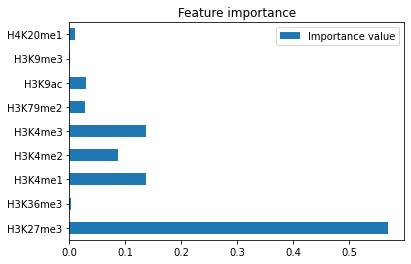

In [27]:
feature_df.plot(kind='barh', title = 'Feature importance')

In [28]:
test_result = best_model.predict(X_test)

In [29]:
test_result

array([1., 0., 1., ..., 1., 1., 1.])

In [30]:
best_model.score(X_test, y_test)

0.9096005606166784

# Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

pred = best_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[321,  64],
       [ 65, 977]])

/home/hb/anaconda3/envs/neoantigen/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


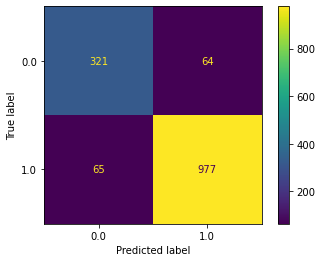

In [32]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, y_test) 

In [33]:
best_model.predict_proba(X_test)

array([[0.02635523, 0.97364477],
       [0.82888563, 0.17111437],
       [0.05225723, 0.94774277],
       ...,
       [0.07161377, 0.92838623],
       [0.14463302, 0.85536698],
       [0.00283041, 0.99716959]])

In [34]:
best_model.predict_proba(X_test)[:, 0]

array([0.02635523, 0.82888563, 0.05225723, ..., 0.07161377, 0.14463302,
       0.00283041])

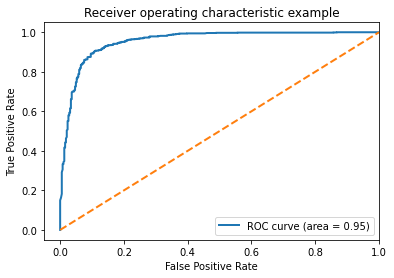

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0],
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_roc_curve(best_model, xTest, yTest)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

# Automl로 쉽게 hyperparameter tuning 하기

In [ ]:
!pip install -U pycaret

In [ ]:
df

In [ ]:
df['enhancer'] = df['enhancer'].astype('int')

In [ ]:
import pycaret
pycaret.__version__

In [ ]:
from pycaret.classification import * 

clf1 = setup(data = df, target = 'enhancer', 
             ignore_features = ['Pos','gene_name'],
             session_id=123)

In [ ]:
# check the model library to see all models
models()

In [ ]:
# train rf model using 5 fold CV
rf = create_model('rf', fold = 5)

In [ ]:
tuned_rf = tune_model(rf)

In [ ]:
import os
import sys
sys.version

In [ ]:
plot_model(tuned_rf, plot = 'auc')

In [ ]:
plot_model(tuned_rf, plot = 'pr')

In [ ]:
plot_model(tuned_rf, plot='feature')

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_rf)

In [ ]:
best_model = compare_models()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

In [ ]:
X = df.values[:,2:-1].astype('float')
y = df.values[:, -1].astype('float')

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [ ]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=xTrain, label = yTrain)
dtest = xgb.DMatrix(data=xTest, label=yTest)

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

In [ ]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(yTest, preds)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)